In [2]:
#import libraries
import pandas as pd
import numpy as np 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import missingno as msno 
from scipy import stats
from colorama import Fore, init
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings ("ignore")

sns.set(style="whitegrid")

In [3]:
#import data
df = pd.read_csv ("C:/Users/Kevvv/Desktop/Apple Quality/apple_quality.csv")

In [4]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


<Axes: >

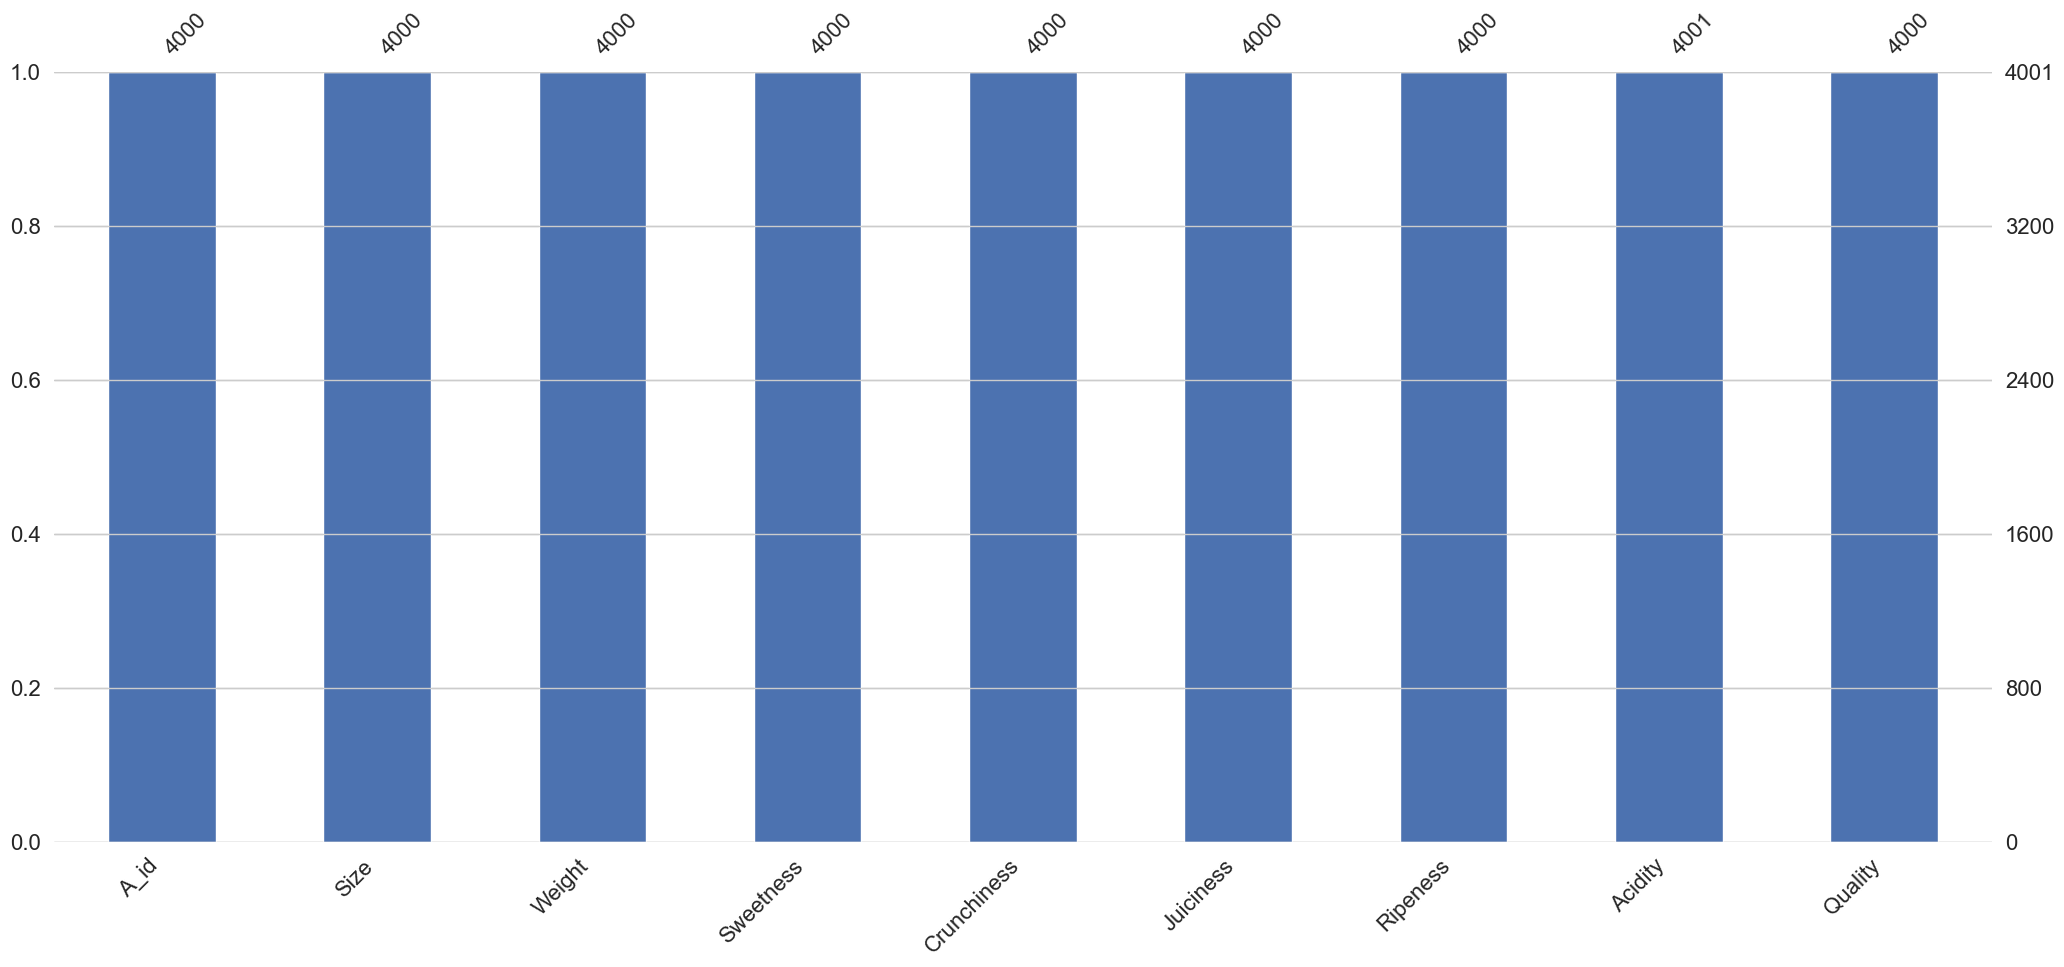

In [6]:
msno.bar(df, color = "b")

In [7]:
df.describe().T.style.background_gradient(axis=0, cmap= "Blues")

,count,mean,std,min,25%,50%,75%,max
A_id,4000.000000,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.000000,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.000000,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.000000,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.000000,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.000000,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.000000,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [8]:
df.duplicated().sum()

0

In [9]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}:{num_distinct_values} distinct values")

A_id:4001 distinct values
Size:4001 distinct values
Weight:4001 distinct values
Sweetness:4001 distinct values
Crunchiness:4001 distinct values
Juiciness:4001 distinct values
Ripeness:4001 distinct values
Acidity:4001 distinct values
Quality:3 distinct values


In [10]:

df.duplicated().sum()

0

In [11]:
""" 
This code is filtering a pandas DataFrame (df) to select only those rows that contain at least one missing (null or NaN) value. 
Let's break down the code: 
df.isnull(): This method returns a DataFrame of the same shape as df, where each element is a boolean value indicating whether the corresponding element in the original DataFrame is a missing value (NaN).
.any(axis=1): This is used to check if there is at least one True value in each row. The axis=1 argument specifies that the check is performed along the columns (axis=0 would check along the rows).
"""
df[df.isnull().any(axis = 1)]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


Clean the DATA!!!

In [12]:
"""
Drop Column: Remove the column named "A_id" from the DataFrame.
Drop NaN Rows: Remove rows containing missing values (NaN).
Type Conversion: Convert the "Acidity" column to the float64 data type.
Label Transformation: Create a new column "Label" based on the transformation rules specified in the label function, using the values in the "Quality" column.
Drop Column: Remove the original "Quality" column.
Type Conversion: Convert the "Label" column to the int64 data type. 
"""
def clean_data(df):
    df = df.drop(columns=["A_id"])
    df = df.dropna()
    df = df.astype({"Acidity":"float64"})
    def label(Quality):
        """
        Transform based on the following examples:
        Quality     Output
        good        0
        bad         1
        """
        if Quality == "good":
            return 0
        if Quality == "bad":
            return 1
        return None
    df["Label"] = df["Quality"].apply(label)
    df = df.drop(columns=["Quality"])
    df = df.astype({"Label" : "int64"})
    return df
df_clean = clean_data(df.copy())
df_clean.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Label        4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


VISUALIZATION

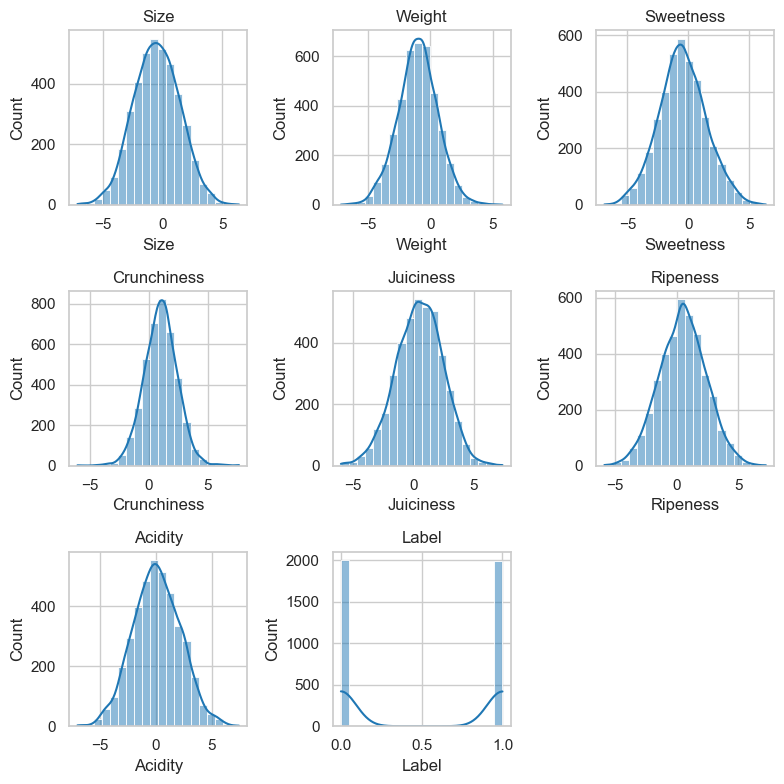

In [14]:
numerical_cols = ["Size", "Weight", "Sweetness", "Crunchiness", "Juiciness", "Ripeness", "Acidity", "Label"]
plt.figure(figsize=(8,8))
sns.set_palette("tab10")
for i, column in enumerate (numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_clean, x = column, kde = True, bins=20)
    plt.title(column)
plt.tight_layout()
plt.show()

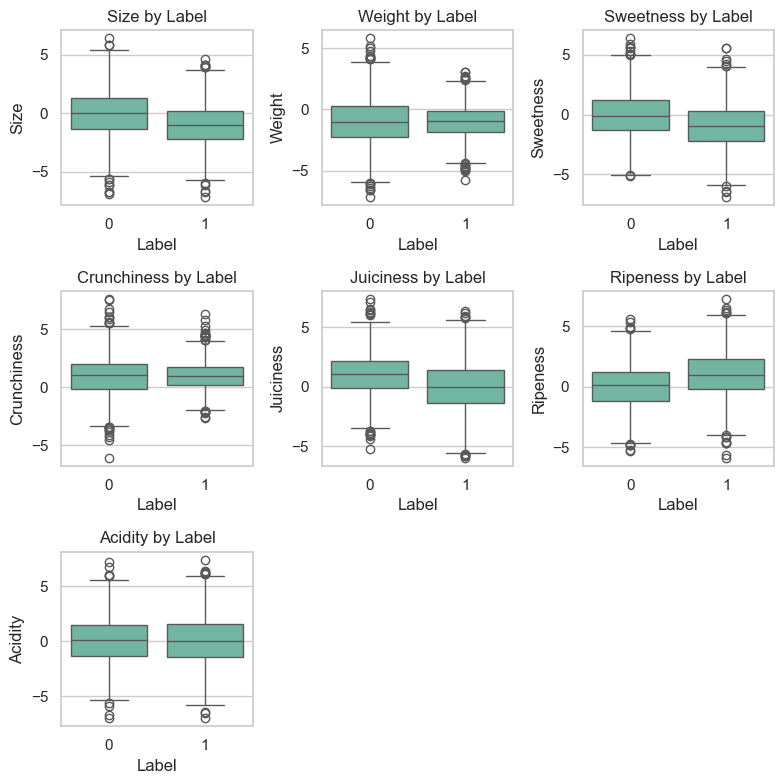

In [20]:
numerical_cols = ["Size", "Weight", "Sweetness", "Crunchiness", "Juiciness", "Ripeness", "Acidity", "Label"]
plt.figure(figsize = (8,8))
sns.set_palette ("Set2")
for i, column in enumerate(df_clean.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(x="Label", y=column, data=df_clean)
    plt.title(f'{column} by Label')
plt.tight_layout()
plt.show()